<font color="red" size="6">  Netflix Stock Price Prediction using LSTM

____________________________________________________________________________________________________

<font color="blue" size="5">Introduction</font>

**The objective of this project is to produce a trained model able to accurately predict stock prices, in turn, providing assistance when trading and understanding the market. This project specifically used data containing Netflix’s stock prices from Juillet 2015 to June 2022.**

__________________________________________________________________________________________________________________

<font color="blue" size="5">Package

In [ ]:
# import required libraries in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam 

<font color="blue" size="5">Data Selection Using Web Scrapping

In [ ]:
from importlib.machinery import SourceFileLoader 
# imports the module from the given path
file = SourceFileLoader("file","file.py").load_module()

>>>  Historical data of NFLX saved


In [ ]:
# #Load Data
df = pd.read_csv("../historic_data/csv/NFLX.csv")
# Show the first 5 rows of the dataframe
df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,16-07-2015,107.680000,111.019997,63461000,116.489998,115.809998,115.809998
1,17-07-2015,114.239998,117.339996,25136900,117.879997,114.769997,114.769997
2,20-07-2015,110.139999,114.699997,22676900,114.699997,110.550003,110.550003
3,21-07-2015,109.320000,110.209999,14085400,113.709999,112.510002,112.510002
4,22-07-2015,110.559998,112.139999,10500500,113.879997,111.500000,111.500000


In [ ]:
# Show the last 5 rows of the dataframe
df.tail()

,Date,Low,Open,Volume,High,Close,Adjusted Close
1758,11-07-2022,176.889999,184.729996,6038800,184.990005,177.339996,177.339996
1759,12-07-2022,173.419998,177.330002,6845300,179.779999,174.449997,174.449997
1760,13-07-2022,169.699997,170.500000,12734400,179.179993,176.559998,176.559998
1761,14-07-2022,171.820007,175.559998,9039500,177.520004,174.779999,174.779999
1762,15-07-2022,174.559998,175.580002,16215100,189.220001,189.110001,189.110001


We can see that our data contains 1762 rows and 7 columns.

<font color="blue" size="5">Data description and understanding

In [ ]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1763 non-null   object 
 1   Low             1763 non-null   float64
 2   Open            1763 non-null   float64
 3   Volume          1763 non-null   int64  
 4   High            1763 non-null   float64
 5   Close           1763 non-null   float64
 6   Adjusted Close  1763 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 96.5+ KB


In [ ]:
# summary statistics
df.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,1763.000000,1763.000000,1.763000e+03,1763.000000,1763.000000,1763.000000
mean,300.563710,305.517742,9.186145e+06,310.135076,305.476755,305.476755
std,159.373318,161.686713,7.705039e+06,163.740514,161.531919,161.531919
min,79.949997,80.570000,1.144000e+06,84.699997,82.790001,82.790001
25%,144.339996,146.160004,4.669150e+06,147.224998,145.665001,145.665001
50%,305.730011,311.440002,6.960200e+06,317.000000,312.869995,312.869995
75%,411.790009,419.044998,1.121120e+07,426.910004,419.665009,419.665009
max,686.090027,692.349976,1.333875e+08,700.989990,691.690002,691.690002


In [ ]:
# check for missing values
df.isnull().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64

There is no missing values in data.

In [ ]:
# check for duplicated values()
df.duplicated().sum()

0

<font color="blue" size="5">EDA

In [ ]:
# Change Date column to index Date
df.set_index("Date" , inplace=True)

<font size="3" color="darkgreen">Netflix Stock Price Variation

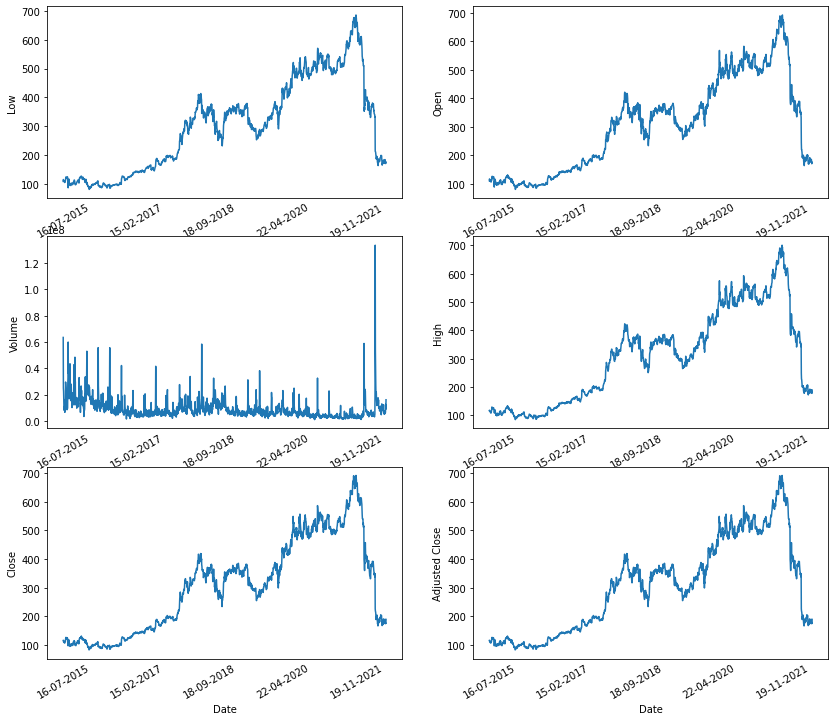

In [ ]:
# Plot the daily stock price variation
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=False, figsize=(14, 12))
for i,ax in enumerate(fig.axes):
    sns.lineplot(x=df.index , y=df.iloc[:,i] , ax=ax)
    ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))

In [ ]:
# Add "per_change" column
# Daily_returns is the percentage change between the current day's close stock price and the previous 
# day's close stock price.
df['per_change'] = df['Adjusted Close'].pct_change()
df.head()

,Low,Open,Volume,High,Close,Adjusted Close,per_change
Date,,,,,,,
16-07-2015,107.680000,111.019997,63461000,116.489998,115.809998,115.809998,NaN
17-07-2015,114.239998,117.339996,25136900,117.879997,114.769997,114.769997,-0.008980
20-07-2015,110.139999,114.699997,22676900,114.699997,110.550003,110.550003,-0.036769
21-07-2015,109.320000,110.209999,14085400,113.709999,112.510002,112.510002,0.017730
22-07-2015,110.559998,112.139999,10500500,113.879997,111.500000,111.500000,-0.008977


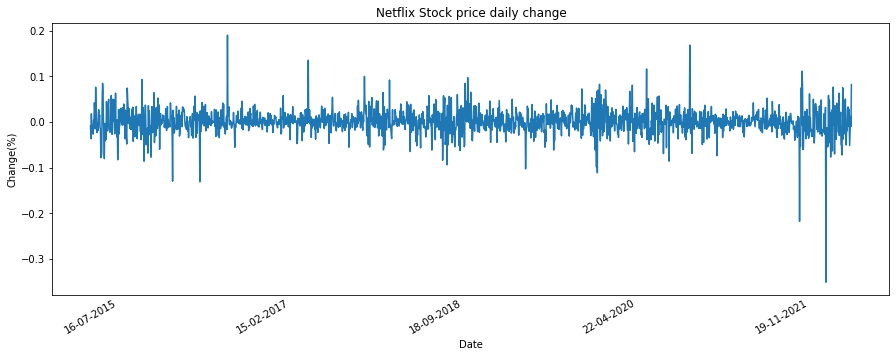

In [ ]:
# plot Netflix Stock price daily change
plt.figure(figsize=(15,5))
plt.title("Netflix Stock price daily change")
ax = sns.lineplot(x=df.index , y=df["per_change"])
ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.ylabel('Change(%)')
plt.show()

<font color="darkgreen" size="3">Best Day Stock price change

In [ ]:
df[df["per_change"]==df["per_change"].max()].per_change

Date
18-10-2016    0.190281
Name: per_change, dtype: float64

The 18'th of October 2016 was the best day with the highest change in stock price from 2015 to 2022.

<font color="darkgreen" size="3">Worst Day Stock price change

In [ ]:
df[df["per_change"]==df["per_change"].min()].per_change

Date
20-04-2022   -0.351166
Name: per_change, dtype: float64

The 20'th of April 2022 was the worst day for Netflix regrading the change in stock price.

<font color="darkgreen" size="3">Top 5 dates with highest stock price

In [ ]:
df.sort_values("High",ascending=False).head().High

Date
17-11-2021    700.989990
19-11-2021    694.159973
18-11-2021    691.739990
29-10-2021    690.969971
01-11-2021    689.969971
Name: High, dtype: float64

<font color="darkgreen" size="3">Top 5 dates with lowest stock price

In [ ]:
df.sort_values("Low").head().Low

Date
08-02-2016    79.949997
09-02-2016    81.550003
05-02-2016    81.860001
11-02-2016    82.910004
19-07-2016    84.500000
Name: Low, dtype: float64

<font color="blue" size="5">Feature selection and Splitting the data into train and test sets

In [ ]:
# Select column 'Close' from the data
df = pd.DataFrame(df.iloc[:,4:5],columns=['Close'])
df.head()

,Close
Date,
16-07-2015,115.809998
17-07-2015,114.769997
20-07-2015,110.550003
21-07-2015,112.510002
22-07-2015,111.500000


In [ ]:
# split data into train and test dataframes
lim = int(len(df)*0.85)
train_df = df.iloc[:lim]
test_df = df.iloc[lim:]

In [ ]:
test_df

,Close
Date,
28-06-2021,533.030029
29-06-2021,533.500000
30-06-2021,528.210022
01-07-2021,533.539978
02-07-2021,533.979980
...,...
11-07-2022,177.339996
12-07-2022,174.449997
13-07-2022,176.559998


<font color="blue" size="5">Feature Scaling

In [ ]:
# Standardize train and test data using the MinMax Scaler
sc = MinMaxScaler(feature_range=(0, 1))

train_data = train_df.values
train_data = sc.fit_transform(train_data.reshape(-1,1))

test_data = test_df.values
test_data = sc.fit_transform(test_data.reshape(-1,1))

In [ ]:
test_data.shape

(265, 1)

<font color="blue" size="5">Create a sequence of feature and label data 

In [ ]:
# Create a list for a sequence of feature data (x_train) and a sequence of label data (y_train)
X_train = []
y_train = []
timestep = 60

# Create a 60-days window of historical prices (i-60) as our feature data (x_train) and the following 60-days window as label data (y_train)
for i in range (timestep,len(train_data)):
    X_train.append(train_data[i-timestep:i,0])
    y_train.append(train_data[i,0]) 

X_train,y_train = np.array(X_train),np.array(y_train)


In [ ]:
X_train.shape

(1438, 60)

In [ ]:
# Reshape the x_train and y_train into a three-dimensional array as part of the requirement to train a LSTM model
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1438, 60, 1)

<font color="blue" size="5">Build the LSTM model

In [ ]:
# Define a Sequential model which consists of a linear stack of layers.
model = Sequential()

# Set the return_sequence to true so that the output of the layer will be another sequence of the same length.
model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False)) # return_sequences is False as we will not add more LSTM layers.
model.add(Dropout(0.2))

#add the output layer. The output dimension is 1 since we are predicting 1 price each time.
model.add(Dense(units =1))

<font color="blue" size="5">Model compiling

In [ ]:
# We are going to use the early_stop to stop training the model if the current loss did not decrease 
# in the next 10 epochs
early_stop = EarlyStopping(monitor='loss',mode='min',patience=10,restore_best_weights=True)

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,loss="mean_squared_error")

<font color="blue" size="5">Model fitting

In [ ]:
# Training the LSTM model
training_hist = model.fit(X_train,y_train,batch_size=64,epochs=100,callbacks=[early_stop])

Epoch 1/100
23/23 [==============================] - 13s 263ms/step - loss: 0.0035
Epoch 2/100
23/23 [==============================] - 6s 260ms/step - loss: 0.0022
Epoch 3/100
23/23 [==============================] - 6s 261ms/step - loss: 0.0019
Epoch 4/100
23/23 [==============================] - 6s 262ms/step - loss: 0.0020
Epoch 5/100
23/23 [==============================] - 6s 262ms/step - loss: 0.0020
Epoch 6/100
23/23 [==============================] - 6s 262ms/step - loss: 0.0017
Epoch 7/100
23/23 [==============================] - 6s 263ms/step - loss: 0.0019
Epoch 8/100
23/23 [==============================] - 6s 259ms/step - loss: 0.0017
Epoch 9/100
23/23 [==============================] - 6s 261ms/step - loss: 0.0020
Epoch 10/100
23/23 [==============================] - 6s 261ms/step - loss: 0.0020
Epoch 11/100
23/23 [==============================] - 6s 260ms/step - loss: 0.0015
Epoch 12/100
23/23 [==============================] - 6s 260ms/step - loss: 0.0015
Epoch 13/100

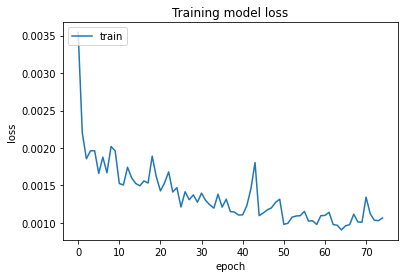

In [ ]:
plt.plot(training_hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

<font color="blue" size="5">Model prediction

In [ ]:
# labeled test data
y_test = test_data[60:,0:] 
y_test.shape

(205, 1)

In [ ]:
# create a  list for the sequence of feature data(X_test)
X_test = []
length = len(test_data)
timestep = 60
for i in range(timestep,length):  
    X_test.append(test_data[i-timestep:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(205, 60, 1)

In [ ]:
# prediction
y_pred = model.predict(X_test)

In [ ]:
# remove the effect of Scaling used before
y_prediction = sc.inverse_transform(y_pred)
y_prediction.shape

In [ ]:
test_df = test_df.iloc[60:]

In [ ]:
test_df.insert(1,"prediction",y_prediction)

In [ ]:
test_df

,Close,prediction
Date,,
22-09-2021,590.650024,572.504456
23-09-2021,593.260010,574.658997
24-09-2021,592.390015,580.938354
27-09-2021,592.640015,585.169189
28-09-2021,583.849976,586.079163
...,...,...
11-07-2022,177.339996,189.461624
12-07-2022,174.449997,188.909439
13-07-2022,176.559998,185.295334


<font color="blue" size="5">Result Visualisation

<font color="darkgreen" size="3">Netflix Stock Price Prediction

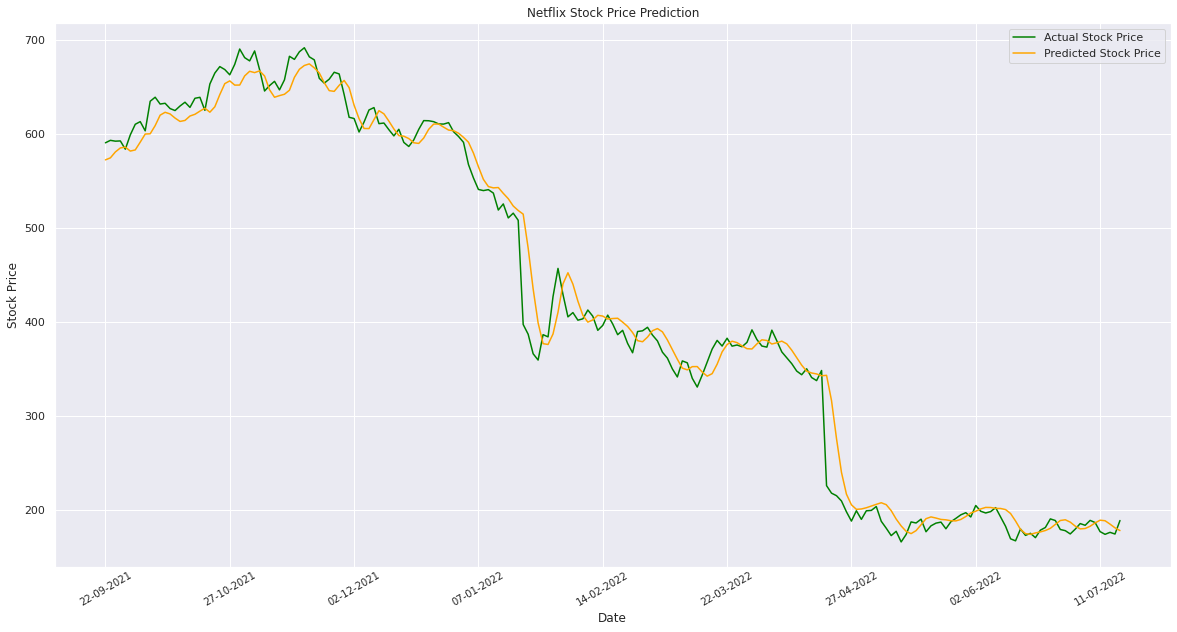

In [ ]:
plt.figure(figsize=(20,10))
sns.set()

ax = sns.lineplot(x=test_df.index , y=test_df["Close"], color = 'green', label = 'Actual Stock Price')
ax = sns.lineplot(x=test_df.index , y=test_df["prediction"],color = 'orange' , label = 'Predicted Stock Price')

ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

plt.title('Netflix Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

<font color="darkgreen" size="3">Netflix Daily Stock Prices

[]

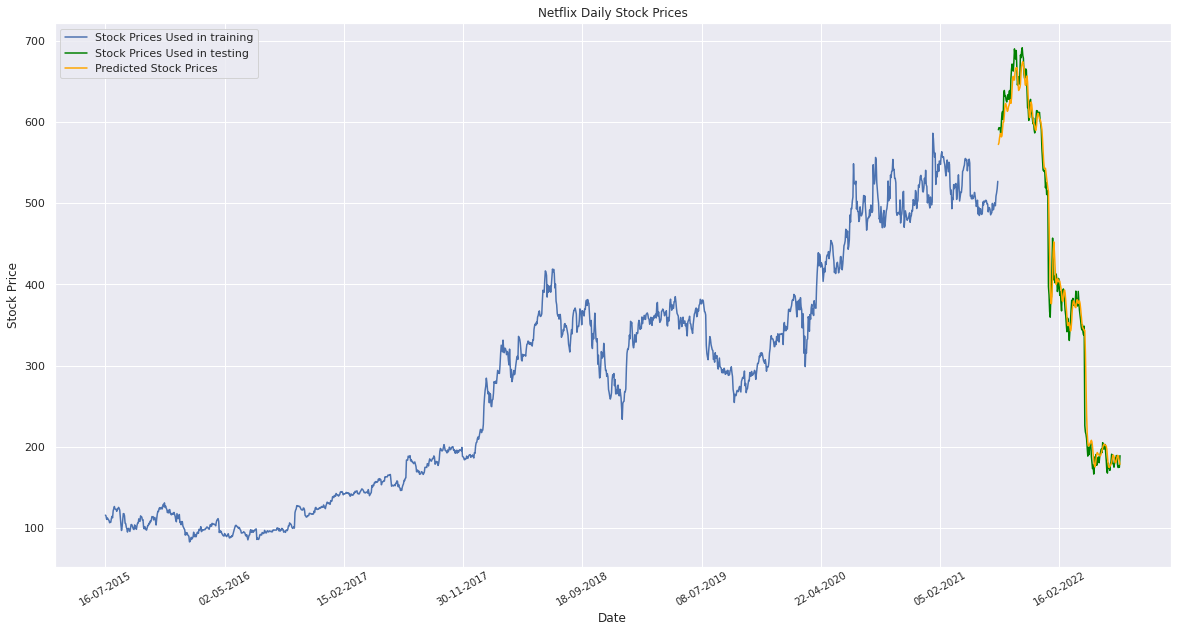

In [ ]:
plt.figure(figsize=(20,10))
sns.set()

ax = sns.lineplot(x=train_df.index , y=train_df["Close"] , label = 'Stock Prices Used in training')
ax = sns.lineplot(x=test_df.index , y=test_df["Close"] ,  color="green" , label = 'Stock Prices Used in testing')
ax = sns.lineplot(x=test_df.index , y=test_df["prediction"] , color="orange" , label = 'Predicted Stock Prices')

ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

plt.title('Netflix Daily Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.plot()

<font size="8"> Thank You !!